# Try and pull in the original tiff and threshold it




**Date** August 2022

Import some useful modules

In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
#from datacube.storage import masking
import os
#sys.path.append('../Scripts/')
#import dea_spatialtools
import pandas as pd
import numpy as np


Matplotlib is building the font cache using fc-list. This may take a moment.


In [2]:
import sys
sys.path.insert(1, '../Tools/')
import dea_tools.datahandling
from datacube.utils import masking
import dea_tools.spatial #hopefully this replaces dea_spatialtools

In [3]:
from datacube.utils.cog import write_cog

## Load in what we think the original file was

In [4]:
# Open the GeoTIFFs using rasterio

In [5]:
jun28img = '/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/Mac_14_-35_20160627__20160629.tif'

In [6]:
jun28 = xr.open_rasterio(jun28img)

I think that this is the original run of tcw stats, giving us a 'mean wet' for the 28 jun 2016

In [7]:
jun28

<xarray.DataArray (band: 9, y: 4000, x: 4000)>
[144000000 values with dtype=float32]
Coordinates:
  * band     (band) int64 1 2 3 4 5 6 7 8 9
  * y        (y) float64 -3.4e+06 -3.4e+06 -3.4e+06 ... -3.5e+06 -3.5e+06
  * x        (x) float64 1.4e+06 1.4e+06 1.4e+06 ... 1.5e+06 1.5e+06 1.5e+06
Attributes:
    transform:      (25.0, 0.0, 1400000.0, 0.0, -25.0, -3400000.0)
    crs:            +init=epsg:3577
    res:            (25.0, 25.0)
    is_tiled:       1
    nodatavals:     (-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0)
    scales:         (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    AREA_OR_POINT:  Area
    created:        {'lineage': {'algorithm': {'name': 'datacube-stats', 'ver...

In [41]:
#this band should be mean wetness (band 6)
jun28[5]

<xarray.DataArray (y: 4000, x: 4000)>
[16000000 values with dtype=float32]
Coordinates:
    band     int64 6
  * y        (y) float64 -3.4e+06 -3.4e+06 -3.4e+06 ... -3.5e+06 -3.5e+06
  * x        (x) float64 1.4e+06 1.4e+06 1.4e+06 ... 1.5e+06 1.5e+06 1.5e+06
Attributes:
    transform:      (25.0, 0.0, 1400000.0, 0.0, -25.0, -3400000.0)
    crs:            +init=epsg:3577
    res:            (25.0, 25.0)
    is_tiled:       1
    nodatavals:     (-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0)
    scales:         (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    AREA_OR_POINT:  Area
    created:        {'lineage': {'algorithm': {'name': 'datacube-stats', 'ver...

In [23]:
wetness.values.mean()

-1137.6295

In [26]:
wetness = wetness.squeeze()

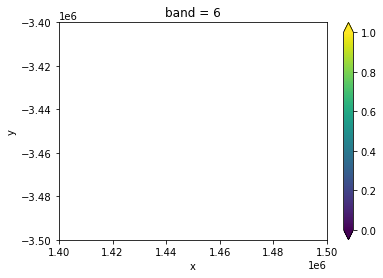

In [34]:
wetness.plot(vmin=0,vmax=1)
plt.show()

In [12]:
#write this out as a cog
#write_cog(cewo_fix2, fname='/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/cewo_20160628_extents_2022b.tif')